# Concrete Compressive Strength Prediciton

## Introduction

Concrete is one of the most commonly used construction materials in the construction industry around the world. It is mainly for as a structural material in construction

In construction, concrete consists of a suitable fine aggregate (typically sand) and coarse aggregates (typically gravel), that are bonded together by cement and water. However, at times, other binding agents such as lime and bitumen have been used to create lime concrete and asphaltic concrete respectively.

## Data Description

The data used in this analysis is attribted to the [UCI Machine Learning Repository ](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength). The Data provides concrete compressive strengths with the material inputs of the concrete varied.

### Dataset Licensing

This dataset is licensed under a [Creative Commons Attribution 4.0 International (CC BY 4.0) license](https://creativecommons.org/licenses/by/4.0/legalcode). This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

#### Acknowledgements

Original Owner and Donor: **Prof. I-Cheng Yeh**: Department of Information Management, Chung-Hua University, Taiwan

### Dataset Characteristics:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

### Dataset Contents:

* Number of instances (observations): 1030
* Number of Attributes: 9
* Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
* Missing Attribute Values: None

### Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

|Name||Data Type||Measurement||Description|
|--|--|--|--|--|--|--|
|Cement||quantitative||kg in a m3 mixture||Input Variable|
|Blast Furnace Slag||quantitative||kg in a m3 mixture||Input Variable|
|Fly Ash||quantitative||kg in a m3 mixture||Input Variable|
|Water||quantitative||kg in a m3 mixture||Input Variable|
|Superplasticizer||quantitative||kg in a m3 mixture||Input Variable|
|Coarse Aggregate||quantitative||kg in a m3 mixture||Input Variable|
|Fine Aggregate||quantitative||kg in a m3 mixture||Input Variable|
|Age||quantitative||Day (1~365)|| Input Variable|
|Concrete compressive strength||quantitative||MPa||Output Variable|
## Data Analysis

This analysis will include:
1. Exploatory Data Analysis
2. Concrete Strength Prediction Model using **Scikit Learn**
3. Data Visulalization in Tableau

In [20]:
# importing my initial packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# import Gradient Boosting Regressor
from xgboost import XGBRegressor

## Importing and Reading the Data

In [8]:
concrete_data = pd.read_csv("Concrete_Data.csv")

In [9]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


From Visual inspection of the data, I would proceed to rename the data to summarised descitpive names:

In [10]:
concrete_data.columns = ['cement','blast_furnace_slag','fly_ash','water',
                         'superPlasticizer', 'coarse_aggregate','fine_aggregate',
                         'age','compressive_strength']

In [11]:
concrete_data.head()

,cement,blast_furnace_slag,fly_ash,water,superPlasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
# number of unique values in the dataset
concrete_data.nunique()

cement                  278
blast_furnace_slag      185
fly_ash                 156
water                   195
superPlasticizer        111
coarse_aggregate        284
fine_aggregate          302
age                      14
compressive_strength    845
dtype: int64

## Data Cleaning
### Check For Missing Values

Once all the columns are renamed, next is to check the data for any missing values.

In [15]:
concrete_data.isnull().sum()

cement                  0
blast_furnace_slag      0
fly_ash                 0
water                   0
superPlasticizer        0
coarse_aggregate        0
fine_aggregate          0
age                     0
compressive_strength    0
dtype: int64

In [16]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1030 non-null   float64
 1   blast_furnace_slag    1030 non-null   float64
 2   fly_ash               1030 non-null   float64
 3   water                 1030 non-null   float64
 4   superPlasticizer      1030 non-null   float64
 5   coarse_aggregate      1030 non-null   float64
 6   fine_aggregate        1030 non-null   float64
 7   age                   1030 non-null   int64  
 8   compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Conclusion:** There are no missing values in the data. Further, the data types for the age column is "Integer". All the other columns are "float".

### Basic Data Exploration

We will the view some summary statistics of the data.

In [17]:
concrete_data.describe()

,cement,blast_furnace_slag,fly_ash,water,superPlasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


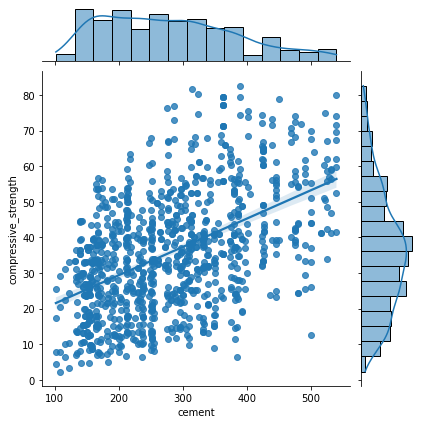

In [22]:
# creating some initial viasulaizations to understand the data better:
sns.jointplot(data=concrete_data, x="cement", y="compressive_strength", kind="reg")

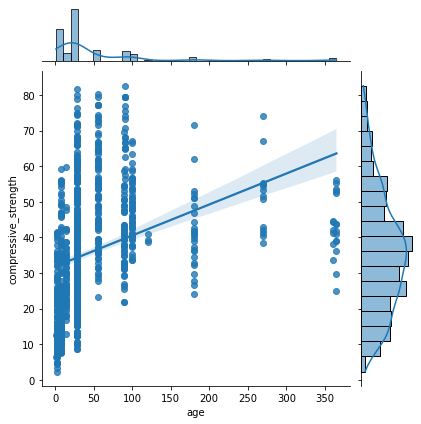

In [23]:
# Further, let us chck the relationship of concrete strenth with age of the concrete
sns.jointplot(data=concrete_data, x="age", y="compressive_strength", kind="reg")

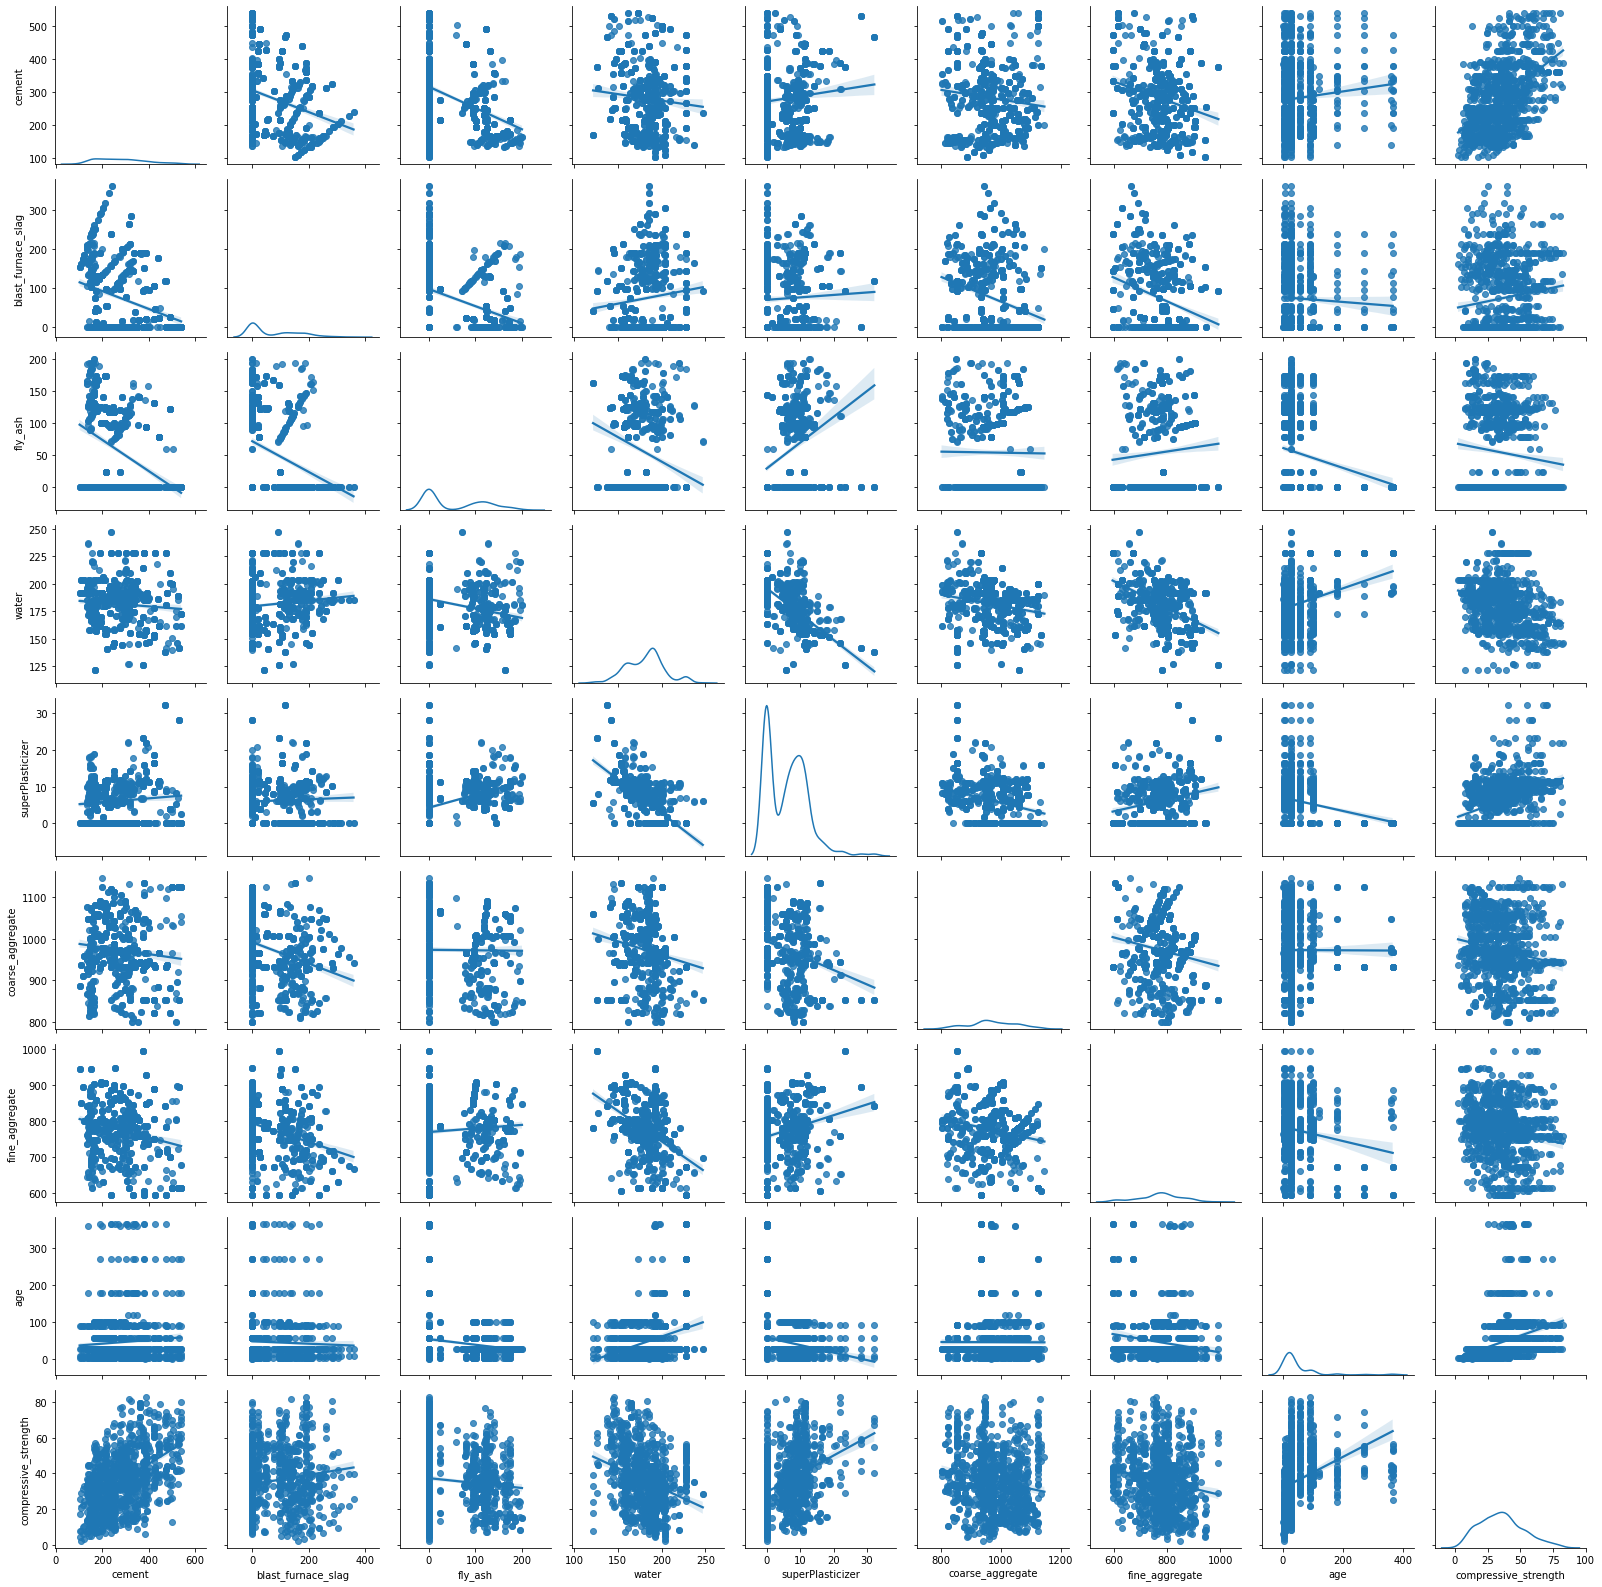

In [26]:
p1 = sns.PairGrid(concrete_data)
p1.map_diag(sns.kdeplot)
p1.map_lower(sns.regplot)
p1.map_upper(sns.regplot)

## Building the Prediction Models

In this case, we are going to focus on two modeling techniques: Random Forests (Random Forest Regressor) and Gradient Boosting (XGB Regressor)
### Technique 1: Random Forest Regressor

In [27]:
# Preview of the data so far
concrete_data.head()

,cement,blast_furnace_slag,fly_ash,water,superPlasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [32]:
# Copying the data to keep the original dataset intact
c_data = concrete_data.copy()

# Setting up the target for the Model
y = c_data.compressive_strength

# dropping the target column from the features in the data
c_data.drop(["compressive_strength"], axis=1, inplace=True)
X = c_data.copy()

In [35]:
# Preview the target dataset
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: compressive_strength, dtype: float64

In [36]:
# preview the features dataset
X.head()

,cement,blast_furnace_slag,fly_ash,water,superPlasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [39]:
#setting up Train-Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [63]:
# Creating an initial pipeline for the mdeling the data
model_1 = data_pipline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=200, random_state=0))
])

In [64]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor', SimpleImputer()),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=0))])

In [65]:
pred_1 = model_1.predict(X_valid)
print("MAE Model #1:", mean_absolute_error(y_valid, pred_1))
print("R2 Score Model #1:", (r2_score(y_valid, pred_1) * 100))

MAE Model #1: 3.1471605810795276
R2 Score Model #1: 92.45660293519975


In [66]:
# Determine the best value for n_estimators
def get_mae(n_estimators):
    pp1 = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
        ])
    pp1.fit(X_train,y_train)
    pred_1 = model_1.predict(X_valid)
    return mean_absolute_error(y_valid, pred_1)

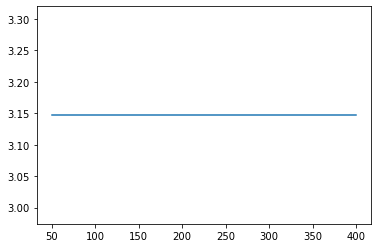

In [67]:
# setting upa range of estimators to review:
estims = {}

for i in range(1,9):
    estims[50*i] = get_mae(50*i)

plt.plot(list(estims.keys()), list(estims.values()))
plt.show()

Changing the value for n_estimators in the range of 50 to 400 doesn't seem to affect the accuracy much. Hence, I adopted a value of nestimators = 200 for this first model.

In [68]:
model_1.fit(X_train,y_train)
pred_1 = model_1.predict(X_valid)
print("MAE Model #1:", mean_absolute_error(y_valid, pred_1))
print("R2 Score Model #1:", (r2_score(y_valid, pred_1) * 100))

MAE Model #1: 3.1471605810795276
R2 Score Model #1: 92.45660293519975


### Technique 2: Extreme Gradient Boosting (XGBoost) Regressor

For the second model, we will try out the XGB regressor to compare the accuracies

In [77]:
# Creating an initial pipeline for the mdeling the data
model_2 = data_pipline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', XGBRegressor(n_estimators=1000, learning_rate=0.05))
])

In [80]:
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_valid)
print("MAE Model #2:", mean_absolute_error(y_valid, pred_2))
print("R2 Score Model #2:", (r2_score(y_valid, pred_2) * 100))

MAE Model #2: 2.6845566271809704
R2 Score Model #2: 93.4239530015707


As expected, the XGB Regressor performs better than the Random Forest Regressor.
Adding the two results to a dataframe for easier comparison

In [82]:
results = {"RFR": [3.147, 92.457], "XGBR": [2.685, 93.424]}
df_results = pd.DataFrame(data=results, index=["MAE", "R2_Score"])
df_results

,RFR,XGBR
MAE,3.147,2.685
R2_Score,92.457,93.424
